In [1]:
from timeit import default_timer as timer
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = timer()

In [2]:
data = pd.read_csv("card transactions.csv", converters= {'Merchnum': lambda x: str(x)})

In [5]:
data['Amount'].sort_values(ascending = False)

52714    3102045.53
47339      47900.00
59516      30372.46
80886      28392.84
89673      27218.00
            ...    
47165          0.08
57855          0.02
78387          0.01
91179          0.01
56124          0.01
Name: Amount, Length: 96753, dtype: float64

In [3]:
data.shape

(96753, 10)

In [4]:
data.dtypes

Recnum                 int64
Cardnum                int64
Date                  object
Merchnum              object
Merch description     object
Merch state           object
Merch zip            float64
Transtype             object
Amount               float64
Fraud                  int64
dtype: object

In [5]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [7]:
sum(data['Fraud'])

1059

In [8]:
print(data['Date'].min(), data['Date'].max())

2006-01-01 2006-12-31


In [9]:
data.describe()

,Recnum,Cardnum,Merch zip,Amount,Fraud
count,96753.000000,9.675300e+04,92097.000000,9.675300e+04,96753.000000
mean,48377.000000,5.142202e+09,44706.596740,4.278857e+02,0.010945
std,27930.329635,5.567084e+04,28369.537945,1.000614e+04,0.104047
min,1.000000,5.142110e+09,1.000000,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,20855.000000,3.348000e+01,0.000000
50%,48377.000000,5.142196e+09,38118.000000,1.379800e+02,0.000000
75%,72565.000000,5.142246e+09,63103.000000,4.282000e+02,0.000000
max,96753.000000,5.142847e+09,99999.000000,3.102046e+06,1.000000


In [11]:
print(data['Amount'].min(), data['Amount'].max(), data['Amount'].mean(), data['Amount'].std())

0.01 3102045.53 427.88567744670206 10006.140301905294


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96753 non-null  int64  
 1   Cardnum            96753 non-null  int64  
 2   Date               96753 non-null  object 
 3   Merchnum           96753 non-null  object 
 4   Merch description  96753 non-null  object 
 5   Merch state        95558 non-null  object 
 6   Merch zip          92097 non-null  float64
 7   Transtype          96753 non-null  object 
 8   Amount             96753 non-null  float64
 9   Fraud              96753 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.4+ MB


In [70]:
data['Recnum'].nunique()

96753

In [71]:
data['Cardnum'].count()/len(data)

1.0

In [69]:
data['Cardnum'].nunique()

1645

In [14]:
data['Cardnum'].value_counts()

5142148452    1192
5142184598     921
5142189108     663
5142297710     583
5142223373     579
              ... 
5142306704       1
5142135021       1
5142276358       1
5142142008       1
5142233066       1
Name: Cardnum, Length: 1645, dtype: int64

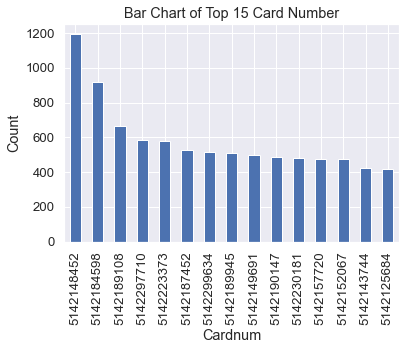

In [17]:
sns.set(font_scale=1.2)
data['Cardnum'].value_counts().head(15).plot(title = 'Bar Chart of Top 15 Card Number', kind = 'bar')
plt.xlabel('Cardnum')
plt.ylabel('Count')
plt.show()

In [113]:
data['Date'].nunique()

365

In [115]:
sum(data['Date']==0)

0

In [119]:
numrecords = len(data)

In [135]:
pd.to_datetime(data['Date'])

0       2006-01-01
1       2006-01-01
2       2006-01-01
3       2006-01-01
4       2006-01-01
           ...    
96748   2006-12-31
96749   2006-12-31
96750   2006-12-31
96751   2006-12-31
96752   2006-12-31
Name: Date, Length: 96753, dtype: datetime64[ns]

<AxesSubplot:title={'center':'Daily Transactions'}, xlabel='Date'>

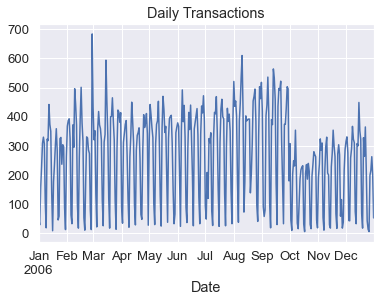

In [136]:
daily_count = data.assign(trx = np.ones(numrecords)).set_index(pd.to_datetime(data['Date'])).resample(dt.timedelta(days = 1))\
    .count().trx
daily_count.plot(title = 'Daily Transactions')

<AxesSubplot:title={'center':'Weekly Transactions'}, xlabel='Date', ylabel='Count'>

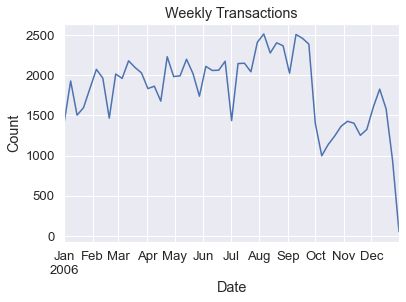

In [148]:
daily_count = data.assign(trx = np.ones(numrecords)).set_index(pd.to_datetime(data['Date'])).resample(dt.timedelta(days = 7))\
    .count().trx
daily_count.plot(title = 'Weekly Transactions', ylabel = 'Count')

In [139]:
goods = data[data['Fraud'] == 0]
bads = data[data['Fraud'] == 1]

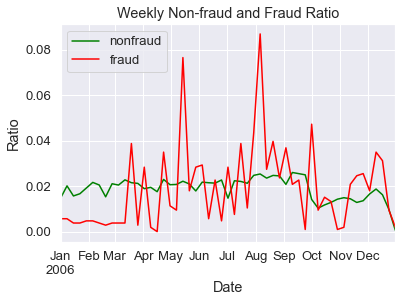

In [151]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(nonfraud = np.ones(ngoods)).set_index(pd.to_datetime(goods['Date'])).resample(dt.timedelta(days = 7)).count().nonfraud
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weekly Non-fraud and Fraud Ratio', color = 'green')
bads_series = bads.assign(fraud = np.ones(nbads)).set_index(pd.to_datetime(bads['Date'])).resample(dt.timedelta(days = 7)).count().fraud
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')
plt.legend(loc="upper left")
plt.ylabel('Ratio')
plt.show()

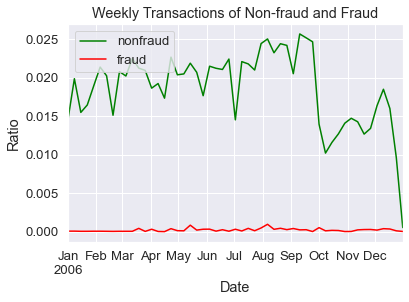

In [150]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(nonfraud = np.ones(ngoods)).set_index(pd.to_datetime(goods['Date'])).resample(dt.timedelta(days = 7)).count().nonfraud
norm_goods_series = goods_series / (ngoods + nbads)
norm_goods_series.plot(title = 'Weekly Transactions of Non-fraud and Fraud', color = 'green')
bads_series = bads.assign(fraud = np.ones(nbads)).set_index(pd.to_datetime(bads['Date'])).resample(dt.timedelta(days = 7)).count().fraud
norm_bads_series = bads_series / (ngoods + nbads)
norm_bads_series.plot(color = 'red')
plt.legend(loc="upper left")
plt.ylabel('Ratio')
plt.show()

In [68]:
data['Merchnum'].nunique()

13092

In [20]:
data['Merchnum'].value_counts()

930090121224     9310
                 3375
5509006296254    2131
9900020006406    1714
602608969534     1092
                 ... 
2000021670061       1
6731000199309       1
9813800006594       1
3065107420906       1
3500000006160       1
Name: Merchnum, Length: 13092, dtype: int64

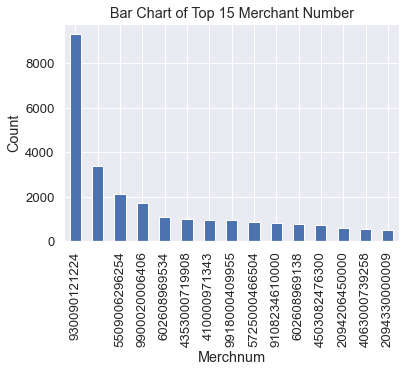

In [22]:
sns.set(font_scale=1.2)
data['Merchnum'].value_counts().head(15).plot(title = 'Bar Chart of Top 15 Merchant Number', kind = 'bar')
plt.xlabel('Merchnum')
plt.ylabel('Count')
plt.show()

In [51]:
data_2 = pd.read_csv("card transactions.csv")

In [64]:
data_2['Merchnum'].count()/len(data_2)

0.9651173607019937

In [60]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96753 non-null  int64  
 1   Cardnum            96753 non-null  int64  
 2   Date               96753 non-null  object 
 3   Merchnum           93378 non-null  object 
 4   Merch description  96753 non-null  object 
 5   Merch state        95558 non-null  object 
 6   Merch zip          92097 non-null  float64
 7   Transtype          96753 non-null  object 
 8   Amount             96753 non-null  float64
 9   Fraud              96753 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.4+ MB


In [66]:
data_2['Merchnum'].nunique()

13091

In [53]:
data_2['Merchnum'].value_counts()

930090121224     9310
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
                 ... 
2000021670061       1
6731000199309       1
9813800006594       1
3065107420906       1
3500000006160       1
Name: Merchnum, Length: 13091, dtype: int64

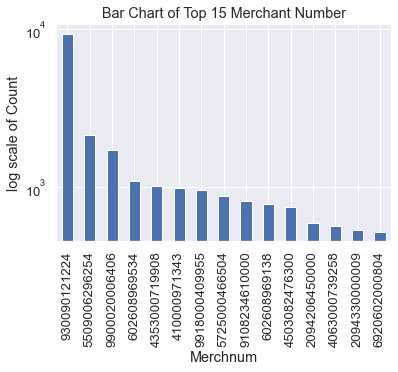

In [57]:
sns.set(font_scale=1.2)
data_2['Merchnum'].value_counts().head(15).plot(title = 'Bar Chart of Top 15 Merchant Number', kind = 'bar')
plt.yscale('log')
plt.xlabel('Merchnum')
plt.ylabel('log scale of Count')
plt.show()

In [81]:
data['Merch description'].count()/len(data)

1.0

In [80]:
data['Merch description'].nunique()

13126

In [23]:
data['Merch description'].value_counts()

GSA-FSS-ADV                 1688
SIGMA-ALDRICH               1635
STAPLES #941                1174
FISHER SCI ATL              1093
MWI*MICRO WAREHOUSE          958
                            ... 
HBD INC                        1
SALES MARKETING MAGAZINE       1
PATTERSON'S TRUE VALUE         1
FLOPPY COPY                    1
BEST BUY      00001610         1
Name: Merch description, Length: 13126, dtype: int64

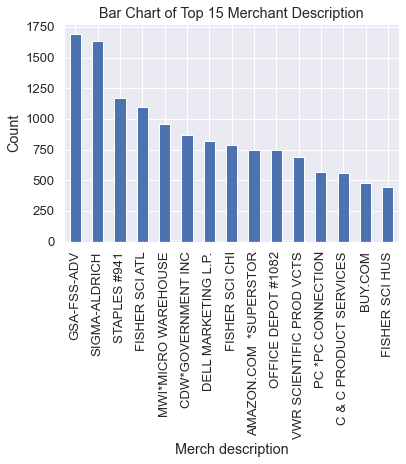

In [24]:
sns.set(font_scale=1.2)
data['Merch description'].value_counts().head(15).plot(title = 'Bar Chart of Top 15 Merchant Description', kind = 'bar')
plt.xlabel('Merch description')
plt.ylabel('Count')
plt.show()

In [77]:
data['Merch state'].count()/len(data)

0.9876489617892985

In [76]:
data['Merch state'].nunique()

227

In [28]:
data['Merch state'].value_counts()

TN     12035
VA      7872
CA      6817
IL      6508
MD      5398
       ...  
495        1
376        1
458        1
546        1
116        1
Name: Merch state, Length: 227, dtype: int64

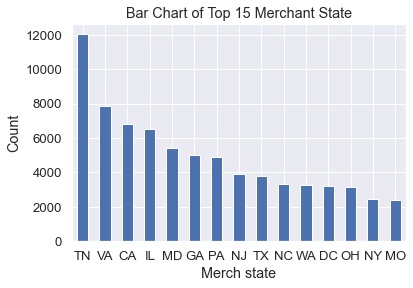

In [33]:
sns.set(font_scale=1.2)
data['Merch state'].value_counts().head(15).plot(title = 'Bar Chart of Top 15 Merchant State', kind = 'bar')
plt.xlabel('Merch state')
plt.xticks(rotation = 360)
plt.ylabel('Count')
plt.show()

In [74]:
data['Merch zip'].count()/len(data)

0.951877461163995

In [75]:
data['Merch zip'].nunique()

4567

In [36]:
data['Merch zip'].value_counts().head(15)

38118.0    11868
63103.0     1650
8701.0      1267
22202.0     1250
60061.0     1221
98101.0     1197
17201.0     1180
30091.0     1092
60143.0      942
60069.0      826
78682.0      817
19380.0      769
20763.0      749
20005.0      648
20748.0      592
Name: Merch zip, dtype: int64

In [38]:
l = data['Merch zip'].value_counts().head(15).index
new_l = []
for i in l:
    new_l.append(round(i))
new_l

[38118,
 63103,
 8701,
 22202,
 60061,
 98101,
 17201,
 30091,
 60143,
 60069,
 78682,
 19380,
 20763,
 20005,
 20748]

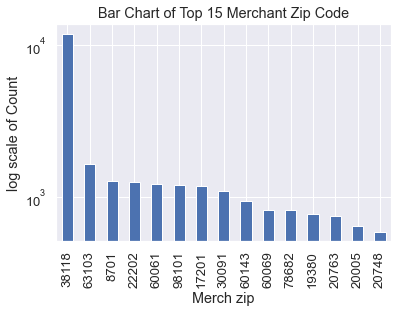

In [42]:
sns.set(font_scale=1.2)
data['Merch zip'].value_counts().head(15).plot(title = 'Bar Chart of Top 15 Merchant Zip Code', kind = 'bar')
plt.yscale('log')
plt.xlabel('Merch zip')
plt.xticks(list(range(0,15)), new_l)
plt.ylabel('log scale of Count')
plt.show()

In [73]:
data['Transtype'].count()/len(data)

1.0

In [78]:
data['Transtype'].nunique()

4

In [44]:
data['Transtype'].value_counts()

P    96398
A      181
D      173
Y        1
Name: Transtype, dtype: int64

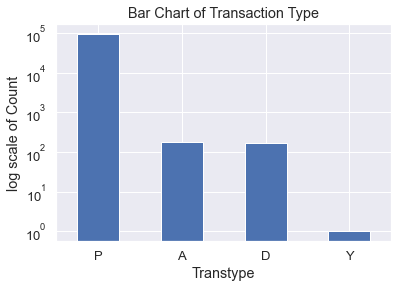

In [50]:
sns.set(font_scale=1.2)
data['Transtype'].value_counts().plot(title = 'Bar Chart of Transaction Type', kind = 'bar')
plt.yscale('log')
plt.xlabel('Transtype')
plt.xticks(rotation = 360)
plt.ylabel('log scale of Count')
plt.show()

In [82]:
data['Amount'].count()/len(data)

1.0

In [84]:
sum(data['Amount'] == 0)/len(data)

0.0

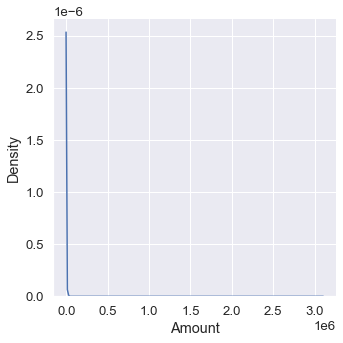

In [85]:
sns.displot(data['Amount'], kind = 'kde')

Text(0.5, 1.0, 'Boxplot of Transaction Amount')

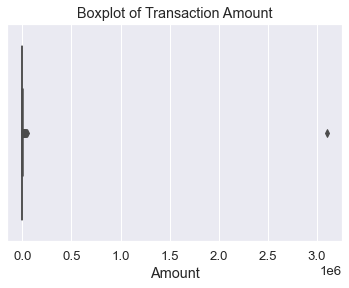

In [169]:
sns.boxplot(x='Amount', data=data)
plt.title('Boxplot of Transaction Amount')

In [157]:
xhigh = 3000
len(data[data['Amount'] <= xhigh])/len(data['Amount'])

0.9932611908674667

/Users/liujinglei/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

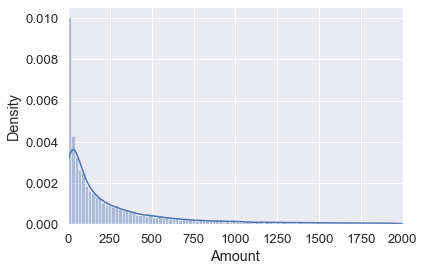

In [97]:
xhigh = 2000
plt.xlim(0,xhigh)
temp = data[data['Amount'] <= xhigh]
sns.distplot(temp['Amount'], bins=100, kde=True)

/Users/liujinglei/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


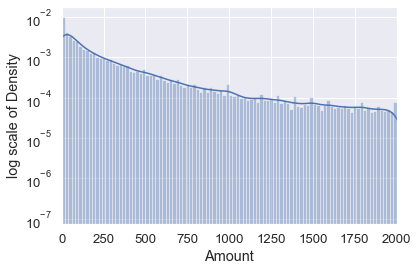

In [103]:
xhigh = 2000
plt.xlim(0,xhigh)
temp = data[data['Amount'] <= xhigh]
sns.distplot(temp['Amount'], bins=100, kde=True)
plt.yscale('log')
plt.ylabel('log scale of Density')
plt.show()

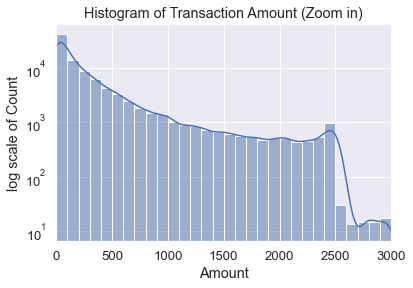

In [170]:
xhigh = 3000
plt.xlim(0,xhigh)
temp = data[data['Amount'] <= xhigh]
sns.histplot(temp['Amount'], bins=30, kde=True)
plt.yscale('log')
plt.ylabel('log scale of Count')
plt.title('Histogram of Transaction Amount (Zoom in)')
plt.show()

In [72]:
data['Fraud'].count()/len(data)

1.0

In [47]:
len(data['Fraud'].unique())

2

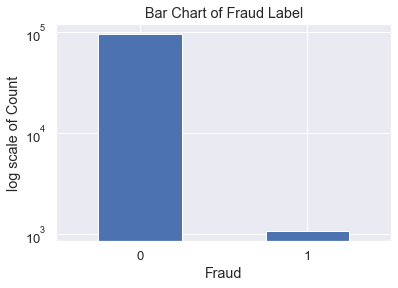

In [112]:
sns.set(font_scale=1.2)
data['Fraud'].value_counts().plot(title = 'Bar Chart of Fraud Label', kind = 'bar')
plt.yscale('log')
plt.xlabel('Fraud')
plt.ylabel('log scale of Count')
plt.xticks(rotation = 360)
plt.show()